In [28]:
# import MNIST data
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(.5, .5),
                                ])

# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=128, shuffle=True)


In [29]:
# This is not needed if you use a for loop to iterate over the data (see below)
images, labels = next(iter(trainloader))  # This creates an iterator that returns a batch of images and labels when calling next()

In [30]:
images.shape, labels.shape # The images are 28x28 and the labels are 1D, the 1 in the dimensions means the image has a single channel (monochrome)

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

tensor(9)


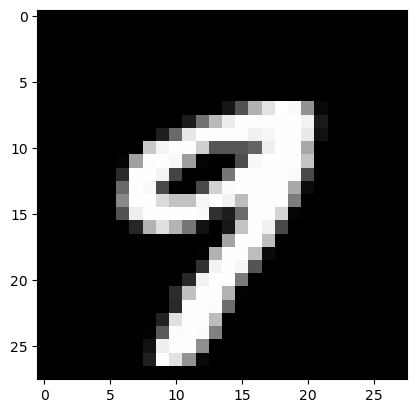

In [21]:
import matplotlib.pyplot as plt

# plot the first image in the batch and print the corresponding label
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');
print(labels[0])

In [34]:
# Flatten the data, each image is 28x28, so after flattening, it is a vector of length 784
images = images.view(images.shape[0], -1)
images.shape    

torch.Size([96, 784])

In [33]:
epochs = 2
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1) # This will be 128x784
        
        # TODO: Training pass